In [2]:
import math
import pandas # libreria de analisis de datos
import numpy # libreria matematica
import matplotlib.pyplot as matplot # extension de numpy

In [3]:
df_whisky = pandas.read_csv('data/whisky.csv', encoding='ISO-8859-1')
df_whisky.head()

,id_Whisky,Precio,Malta,Categoria,Añejamiento,Calidad
0,1,70.0,20.0,Lujo,5.0,3
1,2,60.0,20.0,Lujo,5.0,2
2,3,65.0,20.0,Lujo,7.5,2
3,4,74.0,25.0,Lujo,NaN,2
4,5,70.0,25.0,Lujo,12.0,3


In [4]:
df_whisky['Precio'].isnull().sum()

2

In [5]:
for i in df_whisky['Precio']:
  print(i)

70.0
60.0
65.0
74.0
70.0
nan
70.0
55.0
77.0
93.0
82.0
73.0
62.0
87.0
78.0
73.0
87.0
80.0
85.0
87.0
80.0
83.0
90.0
110.0
87.0
113.0
96.0
82.0
127.0
160.0
90.0
nan
100.0
100.0
95.0


In [6]:
#CALCULO LA MEDIA
sum = 0
count = 0
for p in df_whisky['Precio']:
  if (math.isnan(p) != True):
    count += 1
    sum += p
media = float(int(sum/count))
print(media)

86.0


In [7]:
# REMPLAZO VALORES NAN EN PRECIO POR LA MEDIA CALCULADA
df_whisky.replace({'Precio' : {numpy.nan : media}}, inplace=True)

In [8]:
# CALCULO LA DISPERSION ENTRE Q1-Q2 Y Q2-Q3
q1_q2 = []
q2_q3 = []
for i in df_whisky['Precio']:
  if (i >= 73.5) and (i <= 85):
    q1_q2.append(i)
for i in df_whisky['Precio']:
  if (i >= 85) and (i <= 91.5):
    q2_q3.append(i)
print(numpy.std(numpy.array(q1_q2)), numpy.std(numpy.array(q2_q3)))

3.177855476905576 1.617802197617893


In [9]:
# IMPRIMO COLUMNA PARA VERIFICAR
for i in df_whisky['Precio']:
  print(i)

70.0
60.0
65.0
74.0
70.0
86.0
70.0
55.0
77.0
93.0
82.0
73.0
62.0
87.0
78.0
73.0
87.0
80.0
85.0
87.0
80.0
83.0
90.0
110.0
87.0
113.0
96.0
82.0
127.0
160.0
90.0
86.0
100.0
100.0
95.0


In [10]:
# MEDIDAS ESTADISTICAS
df_whisky['Precio'].describe()

count     35.000000
mean      86.085714
std       19.765346
min       55.000000
25%       73.500000
50%       85.000000
75%       91.500000
max      160.000000
Name: Precio, dtype: float64

<Axes: >

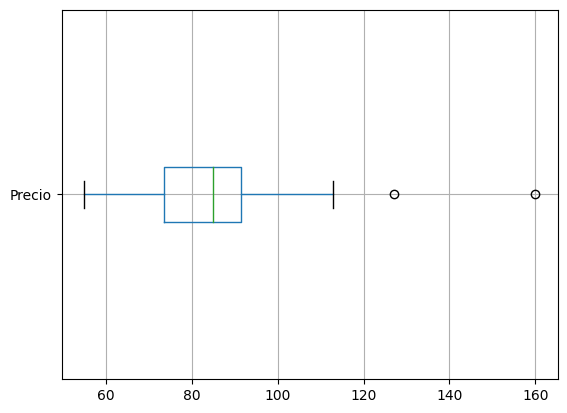

In [11]:
df_whisky.boxplot(column=['Precio'], vert=False)

In [12]:
df_whisky['Categoria'] = df_whisky['Categoria'].replace('lujo', 'Lujo').replace('estandar', 'Estandar')

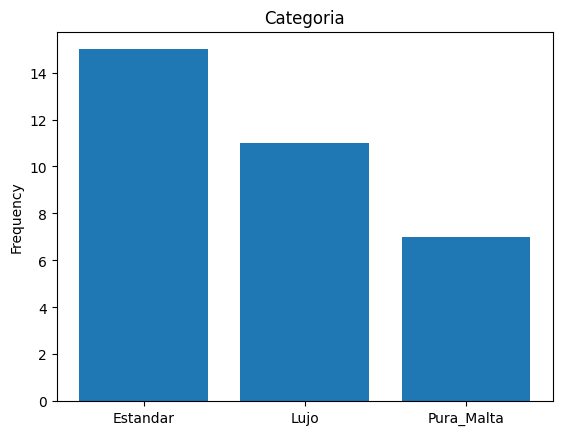

In [13]:
#DIAGRAMA DE BARRAS DEL ATRIBUTO PRODUCTO Y MODA
product_list = pandas.value_counts(df_whisky['Categoria'])
matplot.figure()
matplot.bar(numpy.arange(len(product_list)), product_list)
matplot.title('Categoria')
matplot.ylabel('Frequency')
matplot.xticks(numpy.arange(len(product_list)), product_list.index)
matplot.show()

In [14]:
df_whisky.head()
df_temp = df_whisky.drop(columns=['id_Whisky', 'Categoria'])
df_temp.corr()

,Precio,Malta,Añejamiento,Calidad
Precio,1.000000,0.649563,0.481021,0.282130
Malta,0.649563,1.000000,0.379150,0.241101
Añejamiento,0.481021,0.379150,1.000000,0.275765
Calidad,0.282130,0.241101,0.275765,1.000000


In [15]:
arreglo = numpy.array([1.62, 1.65, 1.70, 1.70, 1.73, 1.74, 1.80, 1.81])
df = pandas.DataFrame({'Altura' : arreglo, 'Normalizacion' : arreglo})
df['Normalizacion'] = (df['Normalizacion']-df['Normalizacion'].min())/(df['Normalizacion'].max()-df['Normalizacion'].min())
print(df.to_string())

   Altura  Normalizacion
0    1.62       0.000000
1    1.65       0.157895
2    1.70       0.421053
3    1.70       0.421053
4    1.73       0.578947
5    1.74       0.631579
6    1.80       0.947368
7    1.81       1.000000


In [18]:
df.boxplot(column='Normalizacion', vert=False)

<Axes: >